In [1]:
# !pip install --upgrade statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

from statsmodels.stats.weightstats import ttest_ind # This is the t-test library of the statsmodels 

In [2]:
grade =  pandas.read_csv('StudentsPerformance.csv')
grade.columns = grade.columns.str.replace(' ', '_', )

In [3]:
grade.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


T-test 
Hypothesis null: Performance of male is equal to female
           Alternate: Performance of male is not equal to female

we are trying to determine whether the test performance differ significantly between male and female
we are companing the means of samples of different population

In [5]:
# lets create a categorical varible sex male-1 female-0 
grade['sex'] = grade.gender.map({'male': 1, 'female': 0})

In [6]:
grade.head() 

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,sex
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0
1,female,group C,some college,standard,completed,69,90,88,247,0
2,female,group B,master's degree,standard,none,90,95,93,278,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,1
4,male,group C,some college,standard,none,76,78,75,229,1


a box plot grouped by gender

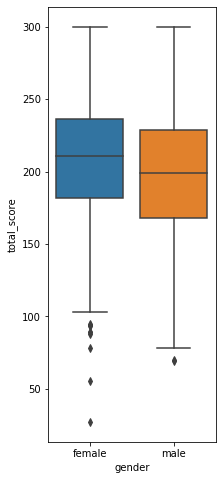

In [8]:
fig, ax = plt.subplots(figsize=(3,8))
sns.boxplot(data=grade, x='gender', y='total_score')  # median for female is slightly higher than male but that does not mean 
# that the performance of females is better than males we have to conduct statistical test to check the significance 

In [9]:
sex_male = grade.loc[grade.sex==1]
sex_female = grade.loc[grade.sex==0]

from IPython.display import display
display(sex_male.head())
display(sex_female.head())

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,sex
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,1
4,male,group C,some college,standard,none,76,78,75,229,1
7,male,group B,some college,free/reduced,none,40,43,39,122,1
8,male,group D,high school,free/reduced,completed,64,64,67,195,1
10,male,group C,associate's degree,standard,none,58,54,52,164,1


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,sex
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0
1,female,group C,some college,standard,completed,69,90,88,247,0
2,female,group B,master's degree,standard,none,90,95,93,278,0
5,female,group B,associate's degree,standard,none,71,83,78,232,0
6,female,group B,some college,standard,completed,88,95,92,275,0


In [10]:
ttest_ind(sex_female.total_score, sex_male.total_score, alternative='two-sided', value=0)

(4.169913529142, 3.311973638243664e-05, 998.0)

Two independent samples passed to ttest_ind function to test weather two samples are different or not meaning whether the performance of females better than male ; results interpretation: average value of male group is 4.1699 standard deviation away from avg of female group , p value is close to 0 and far out in the tails meaning that the even if the samples were similar and this output is a sheer luck then the chance is only 3.311973638243664e-05 thats close to zero so that you can reject the null hypothesis that samples show similar behaviour -> clearly female group perform well than male students.

## Now how about comparing two samples drawn from a same population ; lets draw two samples from total_score , one above median and one below median and check whether there is a significant difference between these groups in performance 

In [11]:
above_median = grade[grade.total_score >= grade.total_score.median()]
display(above_median.head())
below_median = grade[grade.total_score < grade.total_score.median()]
display(below_median.head())

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,sex
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0
1,female,group C,some college,standard,completed,69,90,88,247,0
2,female,group B,master's degree,standard,none,90,95,93,278,0
4,male,group C,some college,standard,none,76,78,75,229,1
5,female,group B,associate's degree,standard,none,71,83,78,232,0


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,sex
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,1
7,male,group B,some college,free/reduced,none,40,43,39,122,1
8,male,group D,high school,free/reduced,completed,64,64,67,195,1
9,female,group B,high school,free/reduced,none,38,60,50,148,0
10,male,group C,associate's degree,standard,none,58,54,52,164,1


In [12]:
ttest_ind(above_median.total_score,below_median.total_score, alternative ='two-sided', value = 0.0)

(41.91357613524281, 2.9174287966116183e-222, 998.0)

#### the output suggests that pvalues are way far in the tails meaning that with in the groups the performance of above median group is far better than performance of below median group ; we can reject the null hypothesis with 2.91*e^-222 percent P value